In [31]:
#Importaciones de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [6]:
#Cargamos el set de datos de los pingüinos
df_pen = pd.read_csv('penguins_size.csv')
#Lo mostramos
display(df_pen)
display(df_pen.describe)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<bound method NDFrame.describe of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     

In [11]:
#Traemos resultados unicos y los visualizamos en vectores. ¿Que especies e islas hay de pingüinos?
display(pd.unique(df_pen['species']))
display(pd.unique(df_pen['island']))
display(pd.unique(df_pen['sex'])) #Vemos nan y '.' que hay que eliminar

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [12]:
#Convertimos datos de columna sex  Nan y raros a nulos
#inplace mofica el df original y no genera una copia
df_pen['sex'].replace('.',np.nan, inplace=True)

In [14]:
display(pd.unique(df_pen['sex'])) #Vemos que los datos '.'  no están

array(['MALE', 'FEMALE', nan], dtype=object)

In [15]:
#mostramos los datos NaN
display(df_pen.isnull())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [17]:
display(df_pen.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [19]:
#Como no podemos rellenar esos datos con nada (Medias, interpolaciones, etc) vamos a eliminarlos
df_penguins_na = df_pen.dropna()
display(df_penguins_na.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
display(df_penguins_na.describe())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [23]:
#Labelencoder de sklearn transforma etiquetas en numericos
species_encoder = LabelEncoder().fit(df_penguins_na['species'])
display(species_encoder.classes_)
#Transformamos el dataframe para cambiar etiqueras por numericos
display(species_encoder.transform(df_penguins_na['species']))

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [24]:
#Transformamos las islas y el sexo de los pingüinos
island_encoder = LabelEncoder().fit(df_penguins_na['island'])
sex_encoder = LabelEncoder().fit(df_penguins_na['sex'])


In [25]:
#Asignamos las columnas que hemos codificado al DF de trabajo
df_penguins_na['species'] = species_encoder.transform(df_penguins_na['species'])
df_penguins_na['island'] = island_encoder.transform(df_penguins_na['island'])
df_penguins_na['sex'] = sex_encoder.transform(df_penguins_na['sex'])


C:\Users\pedro\AppData\Local\Temp\ipykernel_668\1910385985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins_na['species'] = species_encoder.transform(df_penguins_na['species'])
C:\Users\pedro\AppData\Local\Temp\ipykernel_668\1910385985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins_na['island'] = island_encoder.transform(df_penguins_na['island'])
C:\Users\pedro\AppData\Local\Temp\ipykernel_668\1910385985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [27]:
#Los warning de código anteriores son para que confirmemos que se ha hecho todo correctamente
#lo cual visualizamos en el df con:
display(df_penguins_na)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [28]:
#Nos quedamos solo con la parte de especies de dataframe
x_penguins = df_penguins_na.drop(columns=["species"])
y_penguins = df_penguins_na["species"]

display(x_penguins)
display(y_penguins)


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int32

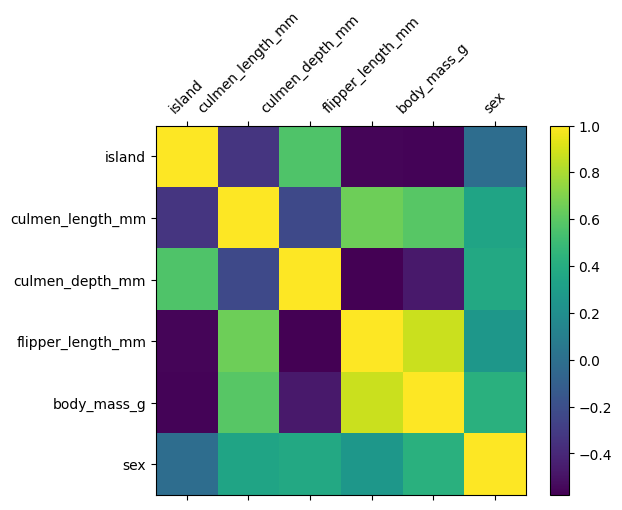

In [38]:
#Vamos a hacer una matriz de correlacion
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(x_penguins.corr())

#Leyenda
fig.colorbar(cax)

#Cambios de ejes - creamos un eje personalizado
labels_position = np.arange(len(x_penguins.columns))

ax.set_xticks(labels_position)
ax.set_xticklabels(x_penguins.columns, rotation = 45)

ax.set_yticks(labels_position)
ax.set_yticklabels(x_penguins.columns)
#Mostramos
plt.show()

In [39]:
#Del plot de arriba podemos extraer conclusiones:
# 1- Los datos no están correlacionados, de forma que se puede usar para entrenar un algoritmo

In [43]:
#Vamos a crear el conjunto de entrenamiento y el de test
x_penguins_train, x_penguins_test, y_penguins_train, y_penguins_test = train_test_split(x_penguins, y_penguins, test_size=0.15,random_state=3)
display(x_penguins_test)
display(y_penguins_test)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
124,2,35.2,15.9,186.0,3050.0,0
159,1,51.3,18.2,197.0,3750.0,1
309,0,52.1,17.0,230.0,5550.0,1
20,0,37.8,18.3,174.0,3400.0,0
90,1,35.7,18.0,202.0,3550.0,0
36,1,38.8,20.0,190.0,3950.0,1
245,0,46.1,15.1,215.0,5100.0,1
62,0,37.6,17.0,185.0,3600.0,0
278,0,43.2,14.5,208.0,4450.0,0
295,0,48.6,16.0,230.0,5800.0,1


124    0
159    1
309    2
20     0
90     0
36     0
245    2
62     0
278    2
295    2
29     0
140    0
61     0
217    1
335    2
272    2
243    2
276    2
330    2
165    1
310    2
120    0
341    2
254    2
244    2
21     0
108    0
209    1
302    2
288    2
264    2
81     0
236    2
161    1
213    1
88     0
234    2
242    2
203    1
328    2
201    1
79     0
104    0
200    1
67     0
327    2
257    2
72     0
255    2
262    2
Name: species, dtype: int32

In [40]:
#Vamos a crear una red neuronal para analizar el conjuntos de datos
#Importamos los algoritmos
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [49]:
#Almacenamos el algoritmo y tocamos los estimadores, que son el numero de decisiones paralelas que puede tomar
rfc = RandomForestClassifier(n_estimators=20)
#Le pasamos el conjunto de entrenamiento
rfc.fit(x_penguins_train, y_penguins_train)

#traemos la prediccion del modelo para el conjunto de test
y_penguins_pred = rfc.predict(x_penguins_test)
acc_score = accuracy_score(y_penguins_pred, y_penguins_test)

#Mostramos un array de las predicciones vs los valores
display(y_penguins_pred)
display(y_penguins_test.values)

#¿Que nivel de precision tiene el algoritmo?
print(acc_score, len(y_penguins_pred))

array([0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1,
       0, 2, 2, 0, 2, 2])

array([0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1,
       0, 2, 2, 0, 2, 2])

1.0 50


In [2]:
#importamos lo necesario de Keras y de tensorflow 
#Si no se puede importar, comprobar las versiones instaladas de ambos módulos y reiniciar
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

#sparse_categorical_crossentropy

In [3]:
penguins_nn = Sequential()

penguins_nn.add(Dense(32, input_shape=(6, ), activation='relu'))
penguins_nn.add(Dense(3, activation='softmax'))

penguins_nn.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.005), metrics=['accuracy'] )

penguins_nn.fit(x_penguins_train, y_penguins_train, bat)

c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
